# import libraries

In [1]:
import os
import glob
import cv2
import numpy as np
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/NSU/Fake_med/archive (1) 2.zip'

Archive:  /content/drive/MyDrive/NSU/Fake_med/archive (1) 2.zip
   creating: archive (1)/
  inflating: __MACOSX/._archive (1)  
  inflating: archive (1)/.DS_Store   
  inflating: __MACOSX/archive (1)/._.DS_Store  
   creating: archive (1)/Real/
  inflating: __MACOSX/archive (1)/._Real  
   creating: archive (1)/Fake/
  inflating: __MACOSX/archive (1)/._Fake  
  inflating: archive (1)/Real/DALLE 2022-09-30 15.07.08 - lung ct image.png  
  inflating: __MACOSX/archive (1)/Real/._DALLE 2022-09-30 15.07.08 - lung ct image.png  
  inflating: archive (1)/Real/DALLE 2022-09-28 20.05.25 - lungs CT image.png  
  inflating: __MACOSX/archive (1)/Real/._DALLE 2022-09-28 20.05.25 - lungs CT image.png  
  inflating: archive (1)/Real/DALLE 2022-09-30 14.58.17 - lung CT image.png  
  inflating: __MACOSX/archive (1)/Real/._DALLE 2022-09-30 14.58.17 - lung CT image.png  
  inflating: archive (1)/Real/DALLE 2022-09-30 14.52.17 - lung CT image.png  
  inflating: __MACOSX/archive (1)/Real/._DALLE 2022-09-30

In [4]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/NSU/Fake_med/Dataset1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 4200 files [01:53, 37.10 files/s] 


In [7]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/NSU/Fake_med'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/train/ (stored 0%)
  adding: content/splitted_data/train/Real/ (stored 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-500.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-392.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-193.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-51.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-122.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-551.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-656.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-232.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-255.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-569.png (deflated 0%)
  adding: content/splitted_data/train/Real/Tuberculosis-200.png (defl

In [8]:
!cp '/content/drive/MyDrive/NSU/Fake_med/splitted_data.zip' -d '/content'
!unzip '/content/splitted_data.zip'

Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/train/
   creating: content/splitted_data/train/Real/
  inflating: content/splitted_data/train/Real/Tuberculosis-500.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-392.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-193.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-51.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-122.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-551.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-656.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-232.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-255.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-569.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-200.png  
  inflating: content/splitted_data/train/Real/Tuberculosis-505.png  
  inflating

In [9]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preprocessing

#### we will split the data by the generator to train,test and validation.

In [10]:
image_gen = ImageDataGenerator()

In [31]:
ig = ImageDataGenerator(rescale=1./255.)
train_flow = ig.flow_from_directory('/content/splitted_data/train',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)

Found 2939 images belonging to 2 classes.


In [32]:
ig1 = ImageDataGenerator(rescale=1./255.)

valid_flow = ig1.flow_from_directory(
    '/content/splitted_data/val',
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical'
)


Found 840 images belonging to 2 classes.


In [33]:
test_flow = ig.flow_from_directory(
    '/content/splitted_data/test',
    target_size=(128, 128),
    batch_size=1,
    shuffle = False,
    class_mode='categorical'
)

Found 421 images belonging to 2 classes.


# Modeling

### Classify The Model

In [34]:
import cv2
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.callbacks import Callback , ReduceLROnPlateau , ModelCheckpoint, CSVLogger
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy

In [35]:
def build_model():
    densenet = ResNet50(
                        weights='imagenet',
                        include_top=False,
                        input_shape=(128,128,3)
                        )
    model = Sequential([densenet,
                        layers.GlobalAveragePooling2D(),
                        layers.Dense(512,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dense(2, activation='softmax')
                        ])
    model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model

In [36]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,639,874
Trainable params: 24,585,730


In [37]:
checkpoint = ModelCheckpoint(filepath='savedmodel.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              verbose=1, 
                              min_delta=0.0001
                             )
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [38]:
train_steps = 2939//64
valid_steps = 840//64

history = model.fit(train_flow,
    epochs = 50,
    steps_per_epoch =train_steps,
    callbacks=callbacks,
    validation_data =valid_flow,
    validation_steps = valid_steps
)

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9395
Epoch 1: val_loss improved from inf to 32319.55273, saving model to savedmodel.h5
45/45 [==============================] - 100s 1s/step - loss: 0.2075 - accuracy: 0.9395 - val_loss: 32319.5527 - val_accuracy: 0.1683 - lr: 0.0010
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9892
Epoch 2: val_loss improved from 32319.55273 to 0.72096, saving model to savedmodel.h5
45/45 [==============================] - 35s 783ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.7210 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9896
Epoch 3: val_loss improved from 0.72096 to 0.69183, saving model to savedmodel.h5
45/45 [==============================] - 39s 861ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.6918 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 4/50
45/45 [=============

In [39]:
train_flow.class_indices

{'Fake': 0, 'Real': 1}

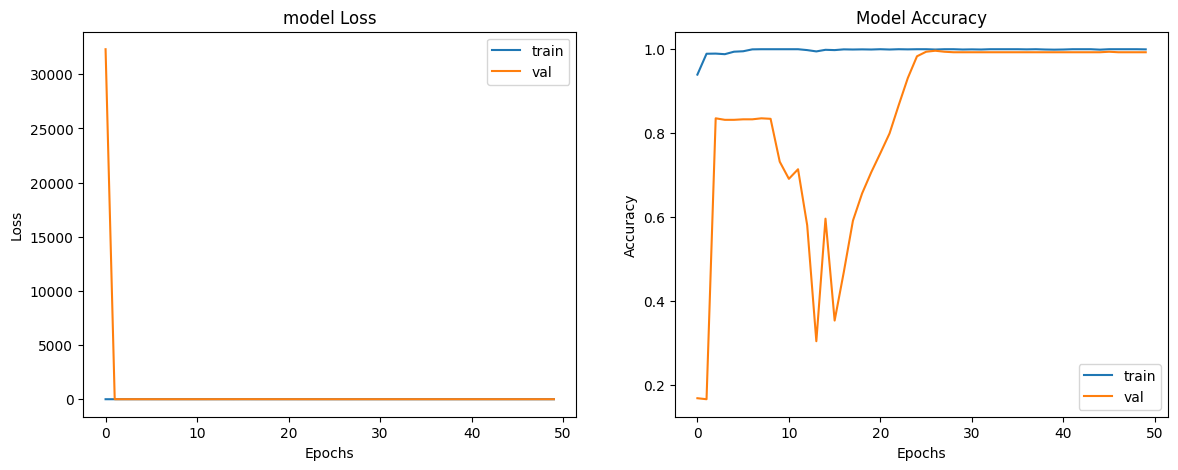

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
_, accu = model.evaluate(test_flow)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

421/421 [==============================] - 9s 20ms/step - loss: 0.0050 - accuracy: 0.9952
Final Test Acccuracy = 99.525


In [42]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

421/421 [==============================] - 9s 18ms/step


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
y_pred = model.predict(test_flow)
y_pred = np.argmax(y_pred, axis=1)

# Convert binary labels to string labels
test_labels = np.where(test_flow.classes==0, 'Real', 'Fake')

421/421 [==============================] - 8s 18ms/step


In [46]:
unique_labels = set(test_flow.classes)
print(unique_labels)

{0, 1}


In [47]:
label_map = {label: i for i, label in enumerate(unique_labels)}
test_labels = np.array([label_map[label] for label in test_flow.classes])


              precision    recall  f1-score   support

        real       1.00      1.00      1.00       350
        fake       0.99      0.99      0.99        71

    accuracy                           1.00       421
   macro avg       0.99      0.99      0.99       421
weighted avg       1.00      1.00      1.00       421



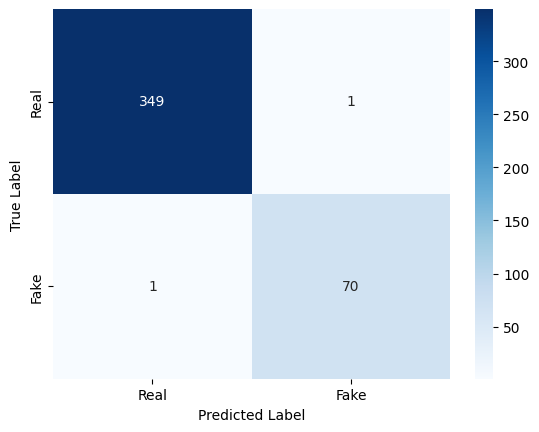

In [48]:
report = classification_report(test_labels, np.round(y_pred), target_names=['real', 'fake'])
print(report)
cm = confusion_matrix(test_labels, np.round(y_pred))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()